In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

In [ ]:
x = sp.symbols('x')

#For plots
def plotted(x,y):
  plt.plot(x,y)
  plt.grid()
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')

#01. Second order differential equation.

Homogenous second order differential equations of the form

$$\frac{d^2y}{dx^2} + a\frac{dy}{dx} + by + c = 0$$

can be solved using python program. We will use the same methods as used before with little modifications. In order to successfully solve this in python we must first write the the equation in the following form

$$\frac{d^2y}{dx^2} = - \bigg(a\frac{dy}{dx} + by + c\bigg)$$

To evaluate the particular solution, we are required to have the initial conditions. The initial conditions for this is given as

$$y(x_0) = y_0  \, \, \text{,} \, \, y'(x_0) = y'_0$$

where $y' = \frac{dy}{dx}$.

##Euler Method:

Example model:
$$y'' - 6y' + 5y = 0$$

Initial conditions:
$$y(0) = 0$$
$$y'(0) = 1$$

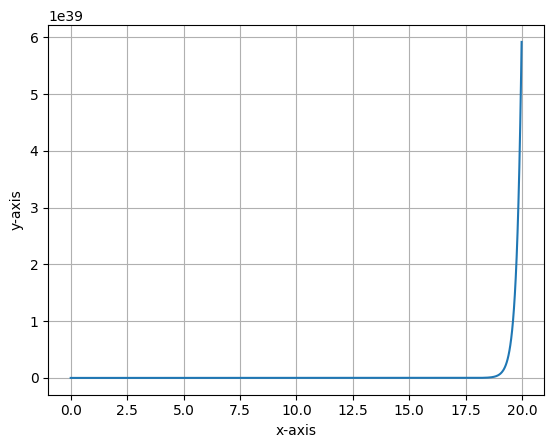

In [ ]:
def y2prime(y,yprime):
  return 6*yprime - 5*y

def EM(x0,xf,y0,yprime0, N):

  dx = (xf - x0)/N

  y_val = []
  x_val = []

  for i in range(0,N):
    y_val.append(y0)
    x_val.append(x0)

    y0 += dx*yprime0

    #Update the first derivative using the second derivative.
    yprime0 += dx*y2prime(y0, yprime0)

    x0 += dx

  return x_val, y_val

x0 = 0
xf = 20
y0 = 0
yprime0 = 1
N = 1000

x_v, y_v = EM(x0,xf,y0,yprime0,N)

plotted(x_v,y_v)

##Runge-Kutta (RK4)

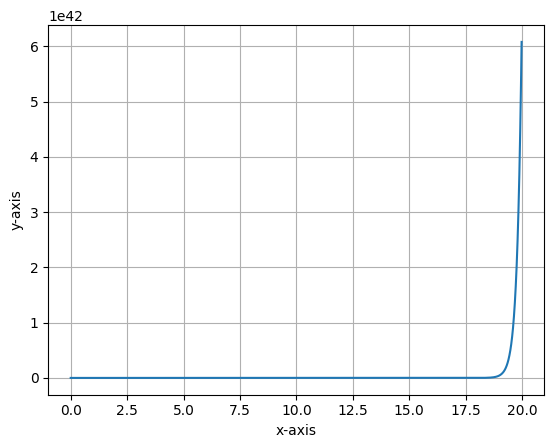

In [ ]:
#Redefine the model in the manner:
def y2prime(x,y):

  #y[0] = y and y[1] = y'

  return np.array([y[1], 6*y[1] - 5*y[0]])


#For the same model
def RK4(x0,xf,y0,N):

  dx = (xf - x0)/N

  x_val = []
  y_val = []

  for i in range(0,N):
    x_val.append(x0)
    y_val.append(y0[0])

    #Update the first derivative
    K1 = dx*y2prime(x0, y0)
    K2 = dx*y2prime(x0 + dx/2, y0 + K1/2)
    K3 = dx*y2prime(x0 + dx/2, y0 + K2/2)
    K4 = dx*y2prime(x0 + dx, y0 + K3)

    y0 += (1/6)*(K1 + 2*K2 + 2*K3 + K4)

    x0 += dx

  return x_val,y_val


x0 = 0
xf = 20
y0 = [0,1]  #y0 is now defined as y0 = [y-value, dy/dx-value]
N = 1000

x_v,y_v = RK4(x0,xf,y0,N)

plotted(x_v,y_v)

##Odeint from scipy.integrate

odeint() can be used to solve differential equations numerically. This works similarly to the Runge-Kutta algorithm.

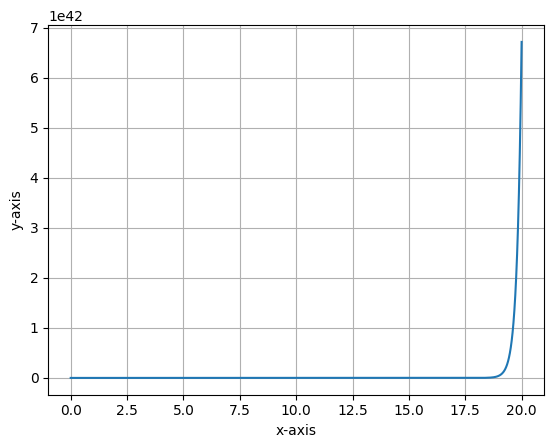

In [ ]:
def model(y, x):
  return [y[1], 6*y[1]-5*y[0]]    #y1[0] = y and y1[1] = y'
#The function returns y' and y'' respectively

x_v = np.linspace(x0, xf, N)

y_v, yprime = odeint(model, [0,1], x_v).T #The .T is used to take transpose of the output matrix such that we can separately unpack the solution into y and yprime.

plotted(x_v, y_v)

##Analytic solution using sympy.dsolve()

General Solution: 


Eq(y(x), (C1 + C2*exp(4*x))*exp(x))


Particular Solution: 


Eq(y(x), (exp(4*x)/4 - 1/4)*exp(x))


Plot of y vs x: 


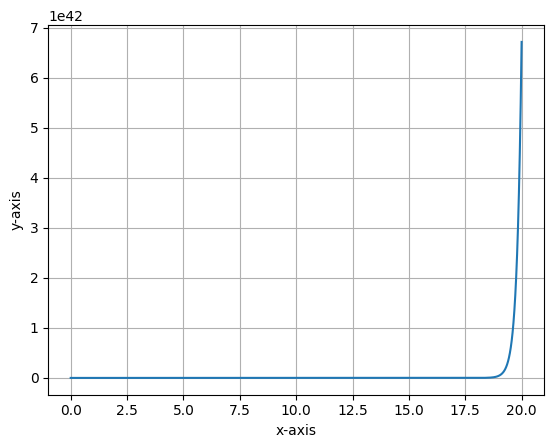

In [ ]:
x = sp.symbols('x')
y = sp.Function('y')
dy = sp.diff(y(x), x)
d2y = sp.diff(y(x),x,2)

eq = d2y - 6*dy + 5*y(x)

print('General Solution: ')
solG = sp.dsolve(eq, y(x))

display(solG.simplify())

print()
print('Particular Solution: ')
solP = sp.dsolve(eq, y(x), ics={y(0):0, dy.subs(x,0):1})
#Syntax for ics --> ics={y(0):initial y, derivative of y.subs(symbol, initial x):initial value of derivative}
display(solP)

print()
print('Plot of y vs x: ')
sol = sp.lambdify(x, solP.rhs)
plotted(x_v, sol(x_v))

#02. Practice Problem:

The equation of motion for a damped Harmonic Oscillator is

$$\frac{d^2x(t)}{dt^2} + 2\gamma \frac{dx(t)}{dt} + \sqrt{2}x(t) = 0$$

here, $x$ is a function of $t$ and $\gamma$ is just a constant.


a) Find the general solution using sympy. And then find the particular solution for the following initial conditions:
$$x(0) = 0$$
$$x'(0) = 0$$
where $x' = \frac{dx}{dt}$.

b) Plot the particular solution. Give axis labels and grids. Use y limit, if necessary, to make the plot clear.

c) Solve this differential equation numerically using Euler Method or Runge-Kutta(RK4). Compare the resulting plot with plot from part b).